In [6]:
# Funkcja użyta żeby statsmodels 0.10.2 w wersji działało
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [7]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.api as sm

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Wczytaj dane opisujące ilość plam słonecznych w okresie od 1700 do 2008 r.

https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html

In [8]:
import pandas as pd
series = pd.read_csv('./sunspots.csv', index_col = 'YEAR', squeeze = True, parse_dates=['YEAR'])

# series = Series.from_csv('./sunspots.csv', header=0)
series.head()

/tmp/ipykernel_11691/1796714442.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./sunspots.csv', index_col = 'YEAR', squeeze = True, parse_dates=['YEAR'])


YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: SUNACTIVITY, dtype: float64

In [9]:
series.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
series.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

# Zadanie
Narysuj szereg czasowy

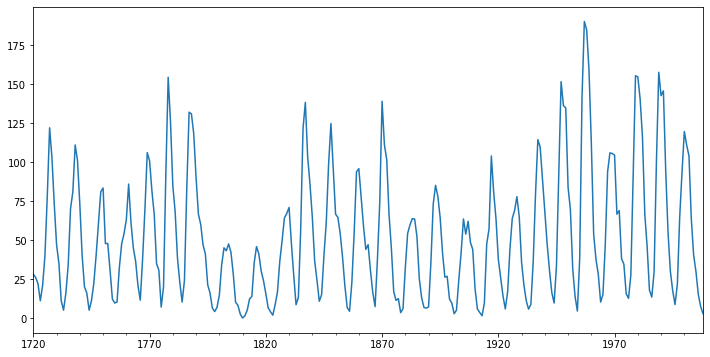

In [10]:
plt.figure(figsize=(12,6));
series.loc['1720':].plot()
plt.show()

### Zanim zdecydujemy, który model ma być używany, musimy przyjrzeć się autokorelacji.

Poleca się stosowanie następujących zasad:

<b>Zasada 1:</b> Jeśli ACF wykazuje rozkłady wykładnicze, a PACF ma skok przy opóźnieniu 1 oraz nie ma korelacji dla innych opóźnień to użyj jednego parametru autoregresji (p).

<b>Zasada 2:</b> Jeśli ACF ma kształt sinusoidy lub powtarzający się wzorzec w kształcie funkcji wykładniczej, a PACF ma skoki przy opóźnieniach 1 i 2 oraz nie ma korelacji dla innych opóźnień to użyj parametrów autoregresji (p) równej dwa.

<b>Zasada 3:</b> Jeśli ACF ma skok w punkcie 1 i nie ma korelacji z innymi opóźnieniami, a PACF maleje wykładniczo to użyj parametru średniej ruchomej (q) równego jeden.

<b>Zasada 4:</b> Jeśli ACF ma skoki przy opóźnieniach 1 i 2 i nie ma korelacji z innymi opóźnieniami, a PACF ma kształt sinusoidy lub zespół rozkładów wykładniczych to użyj parametrów średniej ruchomej (q) równej dwa.

<b>Zasada 5:</b> Jeśli ACF i PACF wygląda jak funkcja wykładnicza zaczynająca się od opóźnienia 1 to użyj parametru autoregresji (p =1) i parametru średniej ruchu (q=1).



# Zadanie
Narysuj funkcję:
- ACF
- PACF

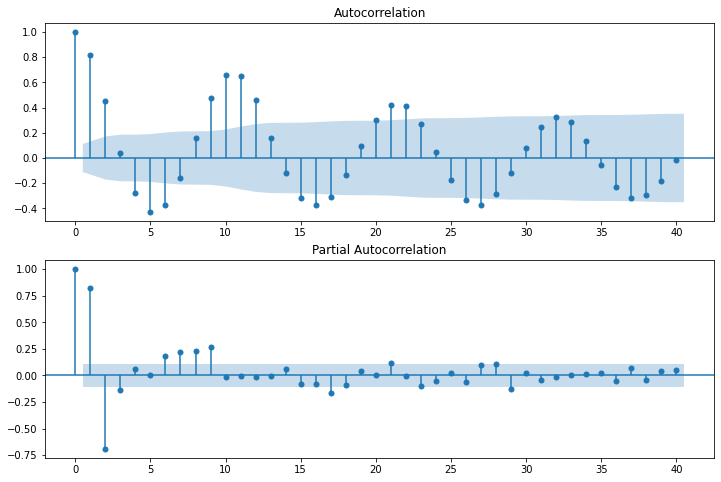

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series.values, lags=40, ax=ax2)
plt.show()

### Statystyka Durbin-Watson

- Innym popularnym testem korelacji szeregowej jest statystyka Durbin-Watson. Statystyczna wartość DW mieści się w przedziale 0-4. 
- Dodatnia korelacja jest związana z wartościami DW poniżej 2 a ujemna korelacja z wartościami DW powyżej 2.
- Wartość statystyki Durbin-Watson wynosi blisko 2, jeśli błędy nie są ze sobą powiązane.

# Zadanie
Wykonaj test Durbina Watsona

In [12]:
sm.stats.durbin_watson(series)

0.13952892659903304

# AR(1) = ARMA(2,0)

Korzystając z zasady 2, najpierw spróbujemy model ARMA(2,0) z dwoma warunkami autoregresji i bez średnich kroczących.

In [62]:
arma_mod20 = sm.tsa.ARMA(series, (2,0), freq='A').fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23082D+00    |proj g|=  8.41816D-04

At iterate    5    f=  4.23082D+00    |proj g|=  2.52864D-04

At iterate   10    f=  4.23080D+00    |proj g|=  3.36531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   0.000D+00   4.231D+00
  F =   4.2308031360267000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Wypiszmy parametry modelu

In [14]:
print(arma_mod20.params)

const                49.659486
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64


Teraz obliczamy Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) oraz Hannan-Quinn Information Criterion (HQIC). Naszym celem jest wybranie modelu, który minimalizuje (AIC, BIC, HQIC).

In [15]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2622.6363380645007 2637.5697031720915 2628.6067259097467


# Analiza Residuals

Test Durbin-Watson nie wykazuje autokorelacji.

In [16]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.145826821916948

Możemy narysować błędy (Residuals)

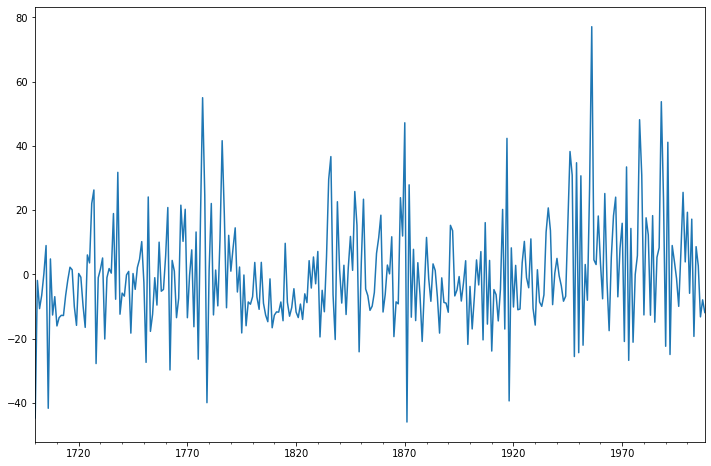

In [17]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);
plt.show()

Możemy sprawdzić ząłorznei o rozkłdzie normalnym błędów.

In [18]:
import scipy.stats as stats
resid20 = arma_mod20.resid
stats.normaltest(resid20)

NormaltestResult(statistic=41.73599551015646, pvalue=8.652542209895379e-10)

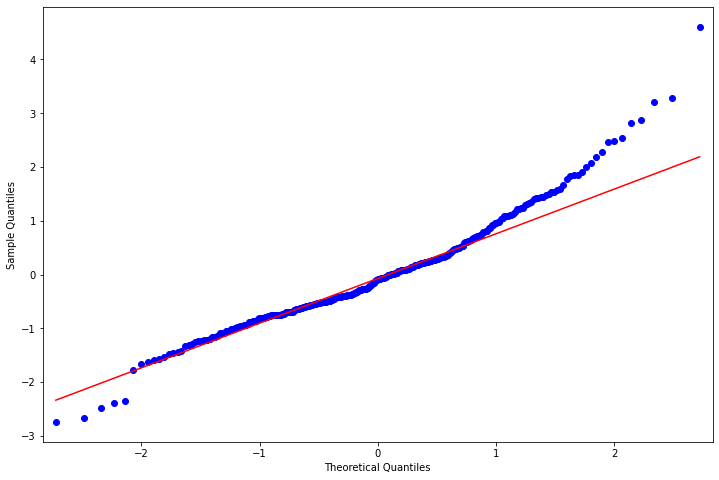

In [19]:
from statsmodels.graphics.api import qqplot
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)
plt.show()

Możemy sprawdzić autokorelację dla błędów

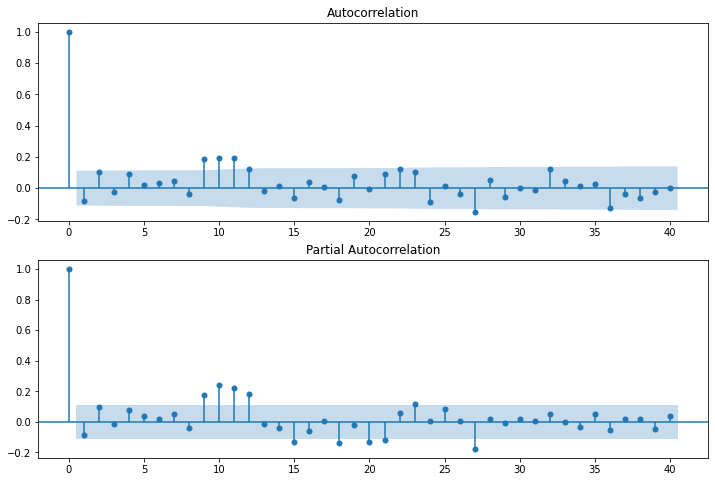

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20.values, lags=40, ax=ax2)
plt.show()

Możemy wypisać pełna informację o modelu:

In [21]:
print(arma_mod20.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 0)   Log Likelihood               -1307.318
Method:                       css-mle   S.D. of innovations             16.576
Date:                Tue, 24 May 2022   AIC                           2622.636
Time:                        11:28:49   BIC                           2637.570
Sample:                    12-31-1700   HQIC                          2628.607
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.6595      3.165     15.689      0.000      43.456      55.863
ar.L1.SUNACTIVITY     1.3907      0.041     33.954      0.000       1.310       1.471
ar.L2.SUNACTIVITY    -0.

## Wykonajmy predykcję 

In [22]:
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
print(predict_sunspots20)

1990-12-31    164.966835
1991-12-31    135.687580
1992-12-31     89.897626
1993-12-31     46.380417
1994-12-31     17.392606
1995-12-31      7.045238
1996-12-31     12.615783
1997-12-31     27.487393
1998-12-31     44.332966
1999-12-31     57.519194
2000-12-31     64.257323
2001-12-31     64.548082
2002-12-31     60.312747
2003-12-31     54.222646
2004-12-31     48.669742
2005-12-31     45.141032
2006-12-31     44.057382
2007-12-31     44.980165
2008-12-31     47.009609
2009-12-31     49.196465
2010-12-31     50.840213
2011-12-31     51.620293
2012-12-31     51.573279
Freq: A-DEC, dtype: float64


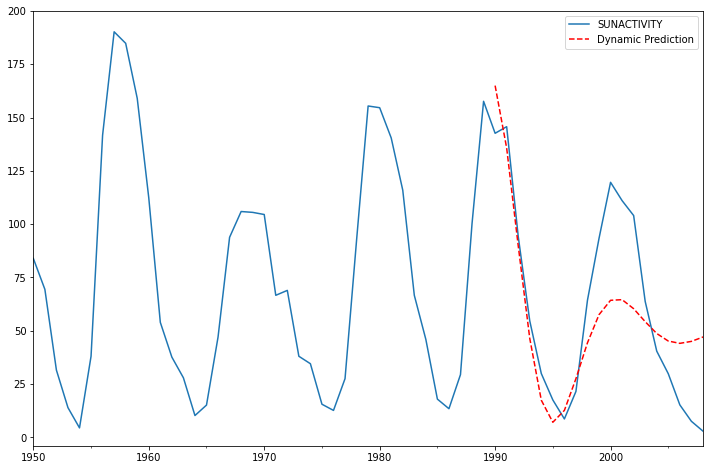

In [23]:
ax = series.loc['1950':].plot(figsize=(12,8))
predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

Możemy policzyć jeszcze błąd:

In [24]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [25]:
print("MFE = ", mean_forecast_err(series, predict_sunspots20))
print ("MAE = ", mean_absolute_err(series, predict_sunspots20))

MFE =  4.730296516809917
MAE =  0.1346853439926492


# Zadanie
Naucz model ARMA(3,0) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# ARMA(3,0)

In [26]:
arma_mod30 = sm.tsa.ARMA(series, (3,0)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22237D+00    |proj g|=  1.77733D-03

At iterate    5    f=  4.22236D+00    |proj g|=  1.28786D-04

At iterate   10    f=  4.22234D+00    |proj g|=  9.72555D-04

At iterate   15    f=  4.22234D+00    |proj g|=  6.21725D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.776D-07   4.222D+00
  F =   4.2223359687662949     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Teraz obliczamy Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) oraz Hannan-Quinn Information Criterion (HQIC). Naszym celem jest wybranie modelu, który minimalizuje (AIC, BIC, HQIC).

In [27]:
print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

2619.40362869757 2638.070335082059 2626.8666135041276


In [28]:
sm.stats.durbin_watson(arma_mod30.resid.values)

1.9564810859967996

Możemy sprawdzić autokorelację dla błędów

In [29]:
resid30 = arma_mod30.resid

In [30]:
stats.normaltest(resid30)

NormaltestResult(statistic=49.844987499379336, pvalue=1.5007159184970975e-11)

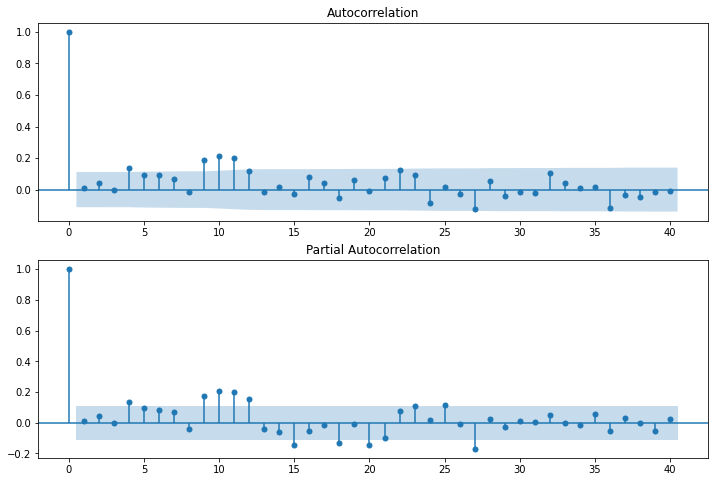

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid30.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid30, lags=40, ax=ax2)
plt.show()

## Wykonajmy predykcję 

In [32]:
predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots30)

1990-12-31    167.047456
1991-12-31    140.993091
1992-12-31     94.859248
1993-12-31     46.861062
1994-12-31     11.242750
1995-12-31     -4.721144
1996-12-31     -1.166791
1997-12-31     16.185784
1998-12-31     39.021954
1999-12-31     59.449936
2000-12-31     72.170212
2001-12-31     75.376866
2002-12-31     70.436556
2003-12-31     60.731697
2004-12-31     50.201913
2005-12-31     42.076144
2006-12-31     38.114399
2007-12-31     38.454747
2008-12-31     41.963911
2009-12-31     46.869377
2010-12-31     51.423348
2011-12-31     54.399807
2012-12-31     55.321783
Freq: A-DEC, dtype: float64


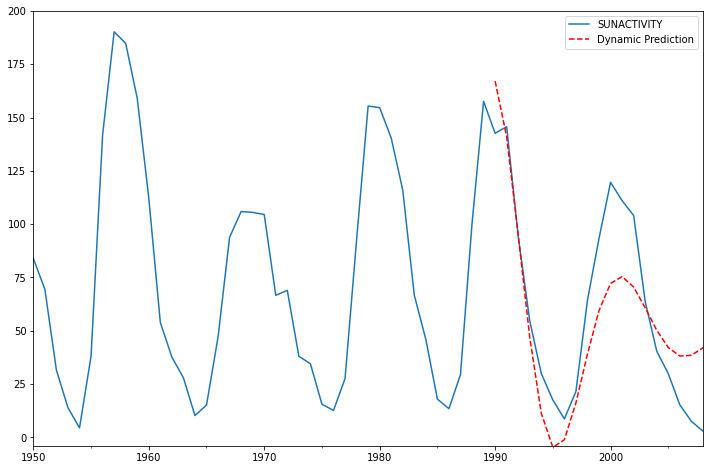

In [33]:
ax = series.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots30.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

In [34]:
print("MFE = ", mean_forecast_err(series, predict_sunspots30))
print("MAE = ", mean_absolute_err(series, predict_sunspots30))

MFE =  5.636853174907355
MAE =  -0.14115268042095502


In [35]:
print(arma_mod30.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(3, 0)   Log Likelihood               -1304.702
Method:                       css-mle   S.D. of innovations             16.435
Date:                Tue, 24 May 2022   AIC                           2619.404
Time:                        11:28:50   BIC                           2638.070
Sample:                    12-31-1700   HQIC                          2626.867
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.7500      2.778     17.907      0.000      44.305      55.195
ar.L1.SUNACTIVITY     1.3008      0.056     23.079      0.000       1.190       1.411
ar.L2.SUNACTIVITY    -0.

# Zadanie
Naucz model ARMA(2,1) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# ARMA(2,1)

In [36]:
arma_mod40 = sm.tsa.ARMA(series, (2,1)).fit()
#print(arma_mod40.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22376D+00    |proj g|=  7.93232D-04

At iterate    5    f=  4.22376D+00    |proj g|=  9.10383D-05

At iterate   10    f=  4.22375D+00    |proj g|=  1.74083D-05

At iterate   15    f=  4.22375D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   0.000D+00   4.224D+00
  F =   4.2237495009042894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


In [37]:
res40 = arma_mod40.resid

In [38]:
print (arma_mod40.params)

const                49.749336
ar.L1.SUNACTIVITY     1.470738
ar.L2.SUNACTIVITY    -0.755121
ma.L1.SUNACTIVITY    -0.153691
dtype: float64


Teraz obliczamy Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC) oraz Hannan-Quinn Information Criterion (HQIC). Naszym celem jest wybranie modelu, który minimalizuje (AIC, BIC, HQIC).

In [39]:
print(arma_mod40.aic, arma_mod40.bic, arma_mod40.hqic)

2620.277191558851 2638.94389794334 2627.7401763654084


Możemy sprawdzić autokorelację dla błędów

In [40]:
resid40 = arma_mod40.resid

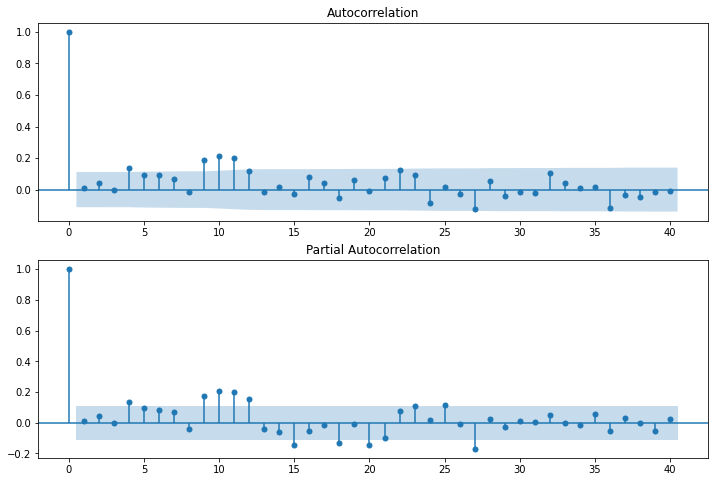

In [41]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid30.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid30, lags=40, ax=ax2)
plt.show()

In [42]:
print(arma_mod40.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 1)   Log Likelihood               -1305.139
Method:                       css-mle   S.D. of innovations             16.458
Date:                Tue, 24 May 2022   AIC                           2620.277
Time:                        11:28:51   BIC                           2638.944
Sample:                    12-31-1700   HQIC                          2627.740
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.7493      2.790     17.832      0.000      44.281      55.217
ar.L1.SUNACTIVITY     1.4707      0.050     29.566      0.000       1.373       1.568
ar.L2.SUNACTIVITY    -0.

## Wykonajmy predykcję 

In [43]:
predict_sunspots40 = arma_mod40.predict('1990', '2012', dynamic=True)

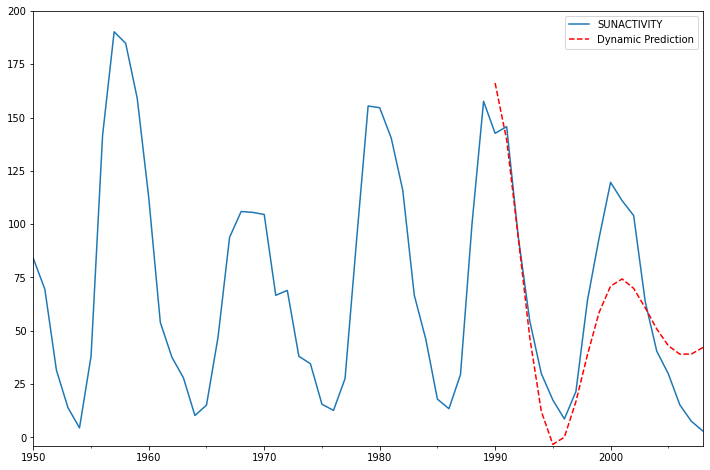

In [44]:
ax = series.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots40.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

In [45]:
print(arma_mod40.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(2, 1)   Log Likelihood               -1305.139
Method:                       css-mle   S.D. of innovations             16.458
Date:                Tue, 24 May 2022   AIC                           2620.277
Time:                        11:28:51   BIC                           2638.944
Sample:                    12-31-1700   HQIC                          2627.740
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.7493      2.790     17.832      0.000      44.281      55.217
ar.L1.SUNACTIVITY     1.4707      0.050     29.566      0.000       1.373       1.568
ar.L2.SUNACTIVITY    -0.

# Zadanie
Naucz model ARMA(2,3) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# ARMA(2,3)

In [46]:
arma_mod50 = sm.tsa.ARMA(series, (2,3)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22146D+00    |proj g|=  1.44480D-03

At iterate    5    f=  4.22145D+00    |proj g|=  9.00613D-05

At iterate   10    f=  4.22145D+00    |proj g|=  2.23821D-04

At iterate   15    f=  4.22144D+00    |proj g|=  2.38565D-04

At iterate   20    f=  4.22144D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   8.882D-08   4.221D+00
  F =   4.2214428653455398     

CONVERG

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


## Wykonajmy predykcję

In [47]:
predict_sunspots50 = arma_mod50.predict('1990', '2012', dynamic=True)

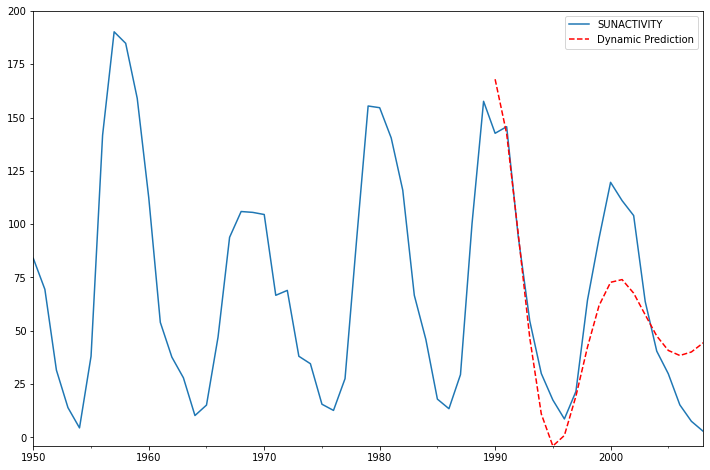

In [48]:
ax = series.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots50.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

# Zadanie
Naucz model ARMA(3,2) oraz:
- wykonaj test Durbin-Watsona
- sprawdź korelację dla błędów
- wykonaj predykcję

# ARMA(3,2)

In [49]:
#arima_mod1 = sm.tsa.ARIMA(series, (3,0,2)).fit()
arima_mod1 = sm.tsa.ARMA(series, (3,2)).fit()

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15533D+00    |proj g|=  9.09672D-03

At iterate    5    f=  4.15502D+00    |proj g|=  6.59739D-04

At iterate   10    f=  4.15500D+00    |proj g|=  2.73026D-04

At iterate   15    f=  4.15482D+00    |proj g|=  6.37952D-03

At iterate   20    f=  4.15465D+00    |proj g|=  9.53015D-05

At iterate   25    f=  4.15465D+00    |proj g|=  1.68754D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     34      1     0     0   

In [50]:
print (arima_mod1.params)

const                48.487420
ar.L1.SUNACTIVITY     2.560637
ar.L2.SUNACTIVITY    -2.471095
ar.L3.SUNACTIVITY     0.892054
ma.L1.SUNACTIVITY    -1.518372
ma.L2.SUNACTIVITY     0.663744
dtype: float64


In [51]:
resid1 = arima_mod1.resid

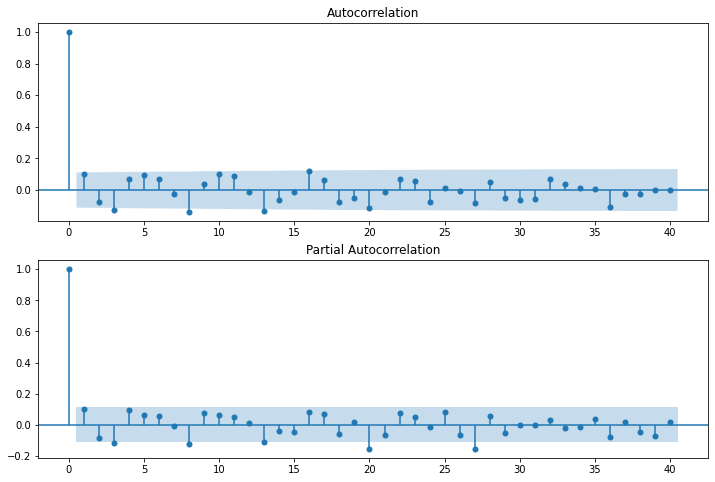

In [52]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)
plt.show()

## Wykonajmy predykcję

In [53]:
predict_sunspots1 = arima_mod1.predict('1990', '2012', dynamic=True)

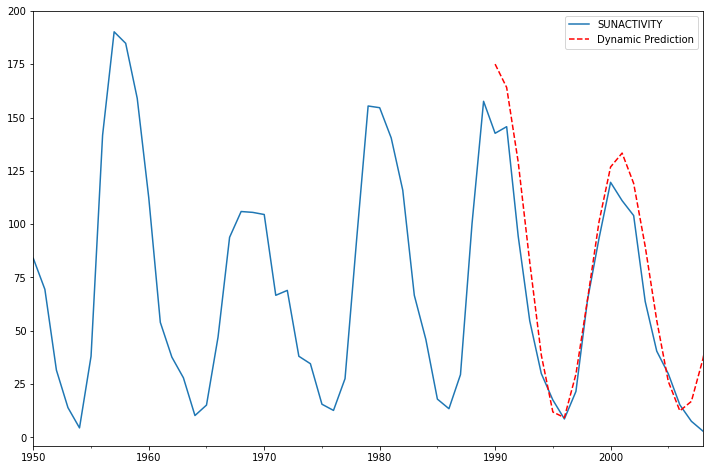

In [54]:
ax = series.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots1.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));
plt.show()

In [55]:
print(arima_mod1.summary())

                              ARMA Model Results                              
Dep. Variable:            SUNACTIVITY   No. Observations:                  309
Model:                     ARMA(3, 2)   Log Likelihood               -1283.786
Method:                       css-mle   S.D. of innovations             15.328
Date:                Tue, 24 May 2022   AIC                           2581.572
Time:                        11:28:53   BIC                           2607.706
Sample:                    12-31-1700   HQIC                          2592.020
                         - 12-31-2008                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                48.4874      6.613      7.332      0.000      35.526      61.448
ar.L1.SUNACTIVITY     2.5606      0.031     83.854      0.000       2.501       2.620
ar.L2.SUNACTIVITY    -2.

# Wnioski

Oczywiście model 5 minimalizuje (aic, bic, hqic). 

Model 1 ma jednak najmniejszy MFE i MAE. 

Pod względem konsystencji model 2 minimalizuje AIC, BIC, HQIC, MFE i MAE. 

Również ARIMA(3,0,2) ma najmniejsze wartości AIC, BIC i HQIC, choć widać nadmieny overfiting. 

Zauważ, że ARIMA(2,0,3) i ARMA(2,3) to te same modele.

# Można sprawdzać wiele modeli:

In [56]:
arma_mod10 = sm.tsa.ARMA(series, (1,0)).fit()
arma_mod20 = sm.tsa.ARMA(series, (2,0)).fit()
arma_mod30 = sm.tsa.ARMA(series, (3,0)).fit()
arma_mod40 = sm.tsa.ARMA(series, (2,1)).fit()
arma_mod50 = sm.tsa.ARMA(series, (2,3)).fit()
arima_mod1 = sm.tsa.ARIMA(series, (3,0,2)).fit()
arima_mod2 = sm.tsa.ARIMA(series, (2,0,2)).fit()
arima_mod3 = sm.tsa.ARIMA(series, (1,0,0)).fit()
arima_mod4 = sm.tsa.ARIMA(series, (0,1,0)).fit()
arima_mod5 = sm.tsa.ARIMA(series, (0,0,1)).fit()
arima_mod6 = sm.tsa.ARIMA(series, (1,1,0)).fit()
arima_mod7 = sm.tsa.ARIMA(series, (0,1,1)).fit()
arima_mod8 = sm.tsa.ARIMA(series, (1,1,1)).fit()
arima_mod9 = sm.tsa.ARIMA(series, (3,0,3)).fit()
arima_mod10= sm.tsa.ARIMA(series, (1,0,6)).fit()
arima_mod11= sm.tsa.ARIMA(series, (1,0,3)).fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55212D+00    |proj g|=  3.10596D-04

At iterate    5    f=  4.55212D+00    |proj g|=  5.40368D-04

At iterate   10    f=  4.55205D+00    |proj g|=  3.41949D-04

At iterate   15    f=  4.55205D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     16     20      1     0     0   8.882D-08   4.552D+00
  F =   4.5520536447065805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.
/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  4.23082D+00    |proj g|=  2.52864D-04

At iterate   10    f=  4.23080D+00    |proj g|=  3.36531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   0.000D+00   4.231D+00
  F =   4.2308031360267000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22237D+00    |proj g|=  1.77733D-03

At iterate    5    f=  4.22236D+00    |proj g|=  1.28786D-04

At iter

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.
/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  4.22376D+00    |proj g|=  9.10383D-05

At iterate   10    f=  4.22375D+00    |proj g|=  1.74083D-05

At iterate   15    f=  4.22375D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   0.000D+00   4.224D+00
  F =   4.2237495009042894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22146D+00    |proj g|=  1.44480D-03

At iter

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   15    f=  4.22144D+00    |proj g|=  2.38565D-04

At iterate   20    f=  4.22144D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     24      1     0     0   8.882D-08   4.221D+00
  F =   4.2214428653455398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15533D+00    |proj g|=  9.09672D-03

At iterate    5    f=  4.15502D+00    |proj g|=  6.59739D-04

At iterate   10    f=  4.15500D+00    |proj g|=  2.73026D-04

At iterate   15    f=  4.15482D+00    |proj g|=  6.37952D-03

At iterate   20    f=  4.15465D+00    |proj g|=  9.53015D-05

At iterate   25    f=  4.15465D+00    |proj g|=  1.68754D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     34      1     0     0   

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.
/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22149D+00    |proj g|=  8.82672D-04

At iterate    5    f=  4.22149D+00    |proj g|=  9.25482D-05

At iterate   10    f=  4.22148D+00    |proj g|=  7.72804D-04

At iterate   15    f=  4.22148D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   3.553D-07   4.221D+00
  F =   4.2214768540800067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.
/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.
/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/home/mikolaj/.l

At iterate    5    f=  4.66167D+00    |proj g|=  9.14024D-04

At iterate   10    f=  4.66165D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   0.000D+00   4.662D+00
  F =   4.6616515672999350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42320D+00    |proj g|=  8.22276D-04

At iterate    5    f=  4.42320D+00    |proj g|=  2.44160D-04

At itera

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14231D+00    |proj g|=  6.30989D-03

At iterate    5    f=  4.14210D+00    |proj g|=  3.87779D-04

At iterate   10    f=  4.14209D+00    |proj g|=  4.13269D-04

At iterate   15    f=  4.14193D+00    |proj g|=  4.47518D-03

At iterate   20    f=  4.14190D+00    |proj g|=  6.00409D-05

At iterate   25    f=  4.14190D+00    |proj g|=  2.22045D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     45      1     0     0   

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25086D+00    |proj g|=  5.68185D-03

At iterate    5    f=  4.25064D+00    |proj g|=  2.06368D-03

At iterate   10    f=  4.25059D+00    |proj g|=  1.17861D-04

At iterate   15    f=  4.25057D+00    |proj g|=  1.07034D-03

At iterate   20    f=  4.25056D+00    |proj g|=  9.85878D-06

At iterate   25    f=  4.25056D+00    |proj g|=  6.21725D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     29     34      1     0     0   

/home/mikolaj/.local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27777D+00    |proj g|=  2.50813D-03

At iterate    5    f=  4.27775D+00    |proj g|=  4.15668D-05

At iterate   10    f=  4.27775D+00    |proj g|=  5.03686D-04

At iterate   15    f=  4.27774D+00    |proj g|=  1.04805D-05

At iterate   20    f=  4.27774D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   8.882D-08   4.278D+00
  F =   4.2777418170253352     

CONVERG

In [57]:
print("Model 01: ARMA(1,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print("Model 02: ARMA(2,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print("Model 03: ARMA(3,0)     AIC", arma_mod30.aic, " BIC", arma_mod30.bic, " HQIC", arma_mod30.hqic)
print("Model 04: ARMA(2,1)     AIC", arma_mod40.aic, "BIC", arma_mod40.bic, " HQIC", arma_mod40.hqic)
print("Model 05: ARMA(2,3)     AIC", arma_mod50.aic, " BIC", arma_mod50.bic, " HQIC", arma_mod50.hqic)
print("Model 06: ARIMA(3,0,2)  AIC", arima_mod1.aic, " BIC", arima_mod1.bic, " HQIC", arima_mod1.hqic)
print("Model 07: ARIMA(2,0,2)  AIC", arima_mod2.aic, " BIC", arima_mod2.bic, " HQIC", arima_mod2.hqic)
print("Model 08: ARIMA(1,0,0)  AIC", arima_mod3.aic, " BIC", arima_mod3.bic, " HQIC", arima_mod3.hqic)
print("Model 09: ARIMA(0,1,0)  AIC", arima_mod4.aic, " BIC", arima_mod4.bic, " HQIC", arima_mod4.hqic)
print("Model 10: ARIMA(0,0,1)  AIC", arima_mod5.aic, " BIC", arima_mod5.bic, " HQIC", arima_mod5.hqic)
print("Model 11: ARIMA(1,1,0)  AIC", arima_mod6.aic, " BIC", arima_mod6.bic, " HQIC", arima_mod6.hqic)
print("Model 12: ARIMA(0,1,1)  AIC", arima_mod7.aic, " BIC", arima_mod7.bic, " HQIC", arima_mod7.hqic)
print("Model 13: ARIMA(1,1,1)  AIC", arima_mod8.aic, " BIC", arima_mod8.bic, " HQIC", arima_mod8.hqic)
print("Model 14: ARIMA(3,0,3)  AIC", arima_mod9.aic, " BIC", arima_mod9.bic, " HQIC", arima_mod9.hqic)
print("Model 15: ARIMA(1,0,6)  AIC", arima_mod10.aic, " BIC", arima_mod10.bic, " HQIC", arima_mod10.hqic)
print("Model 16: ARIMA(1,0,3)  AIC", arima_mod11.aic, " BIC", arima_mod11.bic, " HQIC", arima_mod11.hqic)

Model 01: ARMA(1,0)     AIC 2622.6363380645007  BIC 2637.5697031720915  HQIC 2628.6067259097467
Model 02: ARMA(2,0)     AIC 2622.6363380645007  BIC 2637.5697031720915  HQIC 2628.6067259097467
Model 03: ARMA(3,0)     AIC 2619.40362869757  BIC 2638.070335082059  HQIC 2626.8666135041276
Model 04: ARMA(2,1)     AIC 2620.277191558851 BIC 2638.94389794334  HQIC 2627.7401763654084
Model 05: ARMA(2,3)     AIC 2622.8516907835437  BIC 2648.985079721828  HQIC 2633.2998695127244
Model 06: ARIMA(3,0,2)  AIC 2581.5722989671813  BIC 2607.7056879054653  HQIC 2592.020477696362
Model 07: ARIMA(2,0,2)  AIC 2620.8726958214443  BIC 2643.2727434828307  HQIC 2629.8282775893135
Model 08: ARIMA(1,0,0)  AIC 2819.1691524286666  BIC 2830.36917625936  HQIC 2823.6469433126013
Model 09: ARIMA(0,1,0)  AIC 2835.115773402043  BIC 2842.5759729679903  HQIC 2838.0987051808693
Model 10: ARIMA(0,0,1)  AIC 2886.90066859136  BIC 2898.1006924220533  HQIC 2891.3784594752947
Model 11: ARIMA(1,1,0)  AIC 2730.6897774200434  BIC 27

In [58]:
predict_sunspots10 = arma_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
predict_sunspots30 = arma_mod30.predict('1990', '2012', dynamic=True)
predict_sunspots40 = arma_mod40.predict('1990', '2012', dynamic=True)
predict_sunspots50 = arma_mod50.predict('1990', '2012', dynamic=True)
predict_sunspots1 = arima_mod1.predict('1990', '2012', dynamic=True)
predict_sunspots2 = arima_mod2.predict('1990', '2012', dynamic=True)
predict_sunspots3 = arima_mod3.predict('1990', '2012', dynamic=True)
predict_sunspots4 = arima_mod4.predict('1990', '2012', dynamic=True)
predict_sunspots5 = arima_mod5.predict('1990', '2012', dynamic=True)
predict_sunspots6 = arima_mod6.predict('1990', '2012', dynamic=True)
predict_sunspots7 = arima_mod7.predict('1990', '2012', dynamic=True)
predict_sunspots8 = arima_mod8.predict('1990', '2012', dynamic=True)
predict_sunspots9 = arima_mod9.predict('1990', '2012', dynamic=True)
predict_sunspots10 = arima_mod10.predict('1990', '2012', dynamic=True)
predict_sunspots11 = arima_mod11.predict('1990', '2012', dynamic=True)

In [59]:
print("Metrics for Model 01 ARMA(1,0):    ",mean_forecast_err(series, predict_sunspots10)," MFE  ", mean_absolute_err(series, predict_sunspots10),"MAE") 
print("Metrics for Model 02 ARMA(2,0):    ",mean_forecast_err(series, predict_sunspots20)," MFE  ", mean_absolute_err(series, predict_sunspots20),"MAE") 
print("Metrics for Model 03 ARMA(3,0):    ",mean_forecast_err(series, predict_sunspots30)," MFE  ", mean_absolute_err(series, predict_sunspots30),"MAE") 
print("Metrics for Model 04 ARMA(2,1):    ",mean_forecast_err(series, predict_sunspots40)," MFE  ", mean_absolute_err(series, predict_sunspots40),"MAE") 
print("Metrics for Model 05 ARMA(2,3):    ",mean_forecast_err(series, predict_sunspots50)," MFE  ", mean_absolute_err(series, predict_sunspots50),"MAE") 
print("Metrics for Model 06 ARIMA(3,0,2): ",mean_forecast_err(series, predict_sunspots1)," MFE  ", mean_absolute_err(series, predict_sunspots1),"MAE") 
print("Metrics for Model 07 ARIMA(2,0,2): ",mean_forecast_err(series, predict_sunspots2)," MFE  ", mean_absolute_err(series, predict_sunspots2),"MAE") 
print("Metrics for Model 08 ARIMA(1,0,0): ",mean_forecast_err(series, predict_sunspots3)," MFE  ", mean_absolute_err(series, predict_sunspots3),"MAE") 
print("Metrics for Model 09 ARIMA(0,1,0): ",mean_forecast_err(series, predict_sunspots4)," MFE  ", mean_absolute_err(series, predict_sunspots4),"MAE")
print("Metrics for Model 10 ARIMA(0,0,1): ",mean_forecast_err(series, predict_sunspots5)," MFE  ", mean_absolute_err(series, predict_sunspots5),"MAE") 
print("Metrics for Model 11 ARIMA(1,1,0): ",mean_forecast_err(series, predict_sunspots6)," MFE  ", mean_absolute_err(series, predict_sunspots6),"MAE") 
print("Metrics for Model 12 ARIMA(0,1,1): ",mean_forecast_err(series, predict_sunspots7)," MFE  ", mean_absolute_err(series, predict_sunspots7),"MAE") 
print("Metrics for Model 13 ARIMA(1,1,1): ",mean_forecast_err(series, predict_sunspots8)," MFE  ", mean_absolute_err(series, predict_sunspots8),"MAE") 
print("Metrics for Model 14 ARIMA(3,0,3): ",mean_forecast_err(series, predict_sunspots9)," MFE  ", mean_absolute_err(series, predict_sunspots9),"MAE") 
print("Metrics for Model 15 ARIMA(1,0,6): ",mean_forecast_err(series, predict_sunspots10)," MFE  ", mean_absolute_err(series, predict_sunspots10),"MAE") 
print("Metrics for Model 16 ARIMA(1,0,3): ",mean_forecast_err(series, predict_sunspots11)," MFE  ", mean_absolute_err(series, predict_sunspots11),"MAE") 
      

Metrics for Model 01 ARMA(1,0):     2.4634891233851457  MFE   0.049163366536797704 MAE
Metrics for Model 02 ARMA(2,0):     4.730296516809917  MFE   0.1346853439926492 MAE
Metrics for Model 03 ARMA(3,0):     5.636853174907355  MFE   -0.14115268042095502 MAE
Metrics for Model 04 ARMA(2,1):     5.651804939420347  MFE   4.806251797529017 MAE
Metrics for Model 05 ARMA(2,3):     5.277680117762653  MFE   0.32533713791665037 MAE
Metrics for Model 06 ARIMA(3,0,2):  -13.394828017875227  MFE   0.3574367514039616 MAE
Metrics for Model 07 ARIMA(2,0,2):  5.262205389807896  MFE   0.21586541121021757 MAE
Metrics for Model 08 ARIMA(1,0,0):  -13.310120381791462  MFE   0.20746473318819056 MAE
Metrics for Model 09 ARIMA(0,1,0):  61.3962918660287  MFE   -9004.789473684148 MAE
Metrics for Model 10 ARIMA(0,0,1):  9.301394904276016  MFE   0.18354224010154202 MAE
Metrics for Model 11 ARIMA(1,1,0):  57.850232200221086  MFE   5979.62464129019 MAE
Metrics for Model 12 ARIMA(0,1,1):  60.730607291659524  MFE   -179